# Исследование продаж компьютерных игр интернет-магазина «Стримчик»
**Описание проекта**  
Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**   

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**   
Name — Название игры  
Platform — Платформа  
Year_of_Release — Год выпуска игры  
Genre — Жанр игры  
NA_sales — Продажи в Северной Америке (миллионы проданных копий)   
EU_sales — Продажи в Европе (миллионы проданных копий)  
JP_sales — Продажи в Японии (миллионы проданных копий)   
Other_sales — Продажи в других странах (миллионы проданных копий)   
Critic_Score — Оценка критиков (максимум 100)   
User_Score — Оценка пользователей(максимум 10)  
Rating — Возрастной рейтинг. рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы**  
1  Загрузка данных и изучение общей информации   
2  Подготовка данных  
3  Проведем исследовательский анализ данных  
4  Портрет пользователя каждого региона  
5  Проверим гипотезы   
6  Общий вывод  



In [1]:
#импорируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import scipy.stats as st

## Загрузка данных и изучение общей информации

In [2]:
#Открываем файлы
try:
    data = pd.read_csv('/datasets/games.csv')

except:
    data = pd.read_csv('games.csv')

In [3]:
data.head(10) #выведем первые строки набора данных

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info() #изучим информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.duplicated().sum() #поиск дубликатов

0

In [6]:
#проверим наличие неявных дубликатов
duplicateRows = data[data.duplicated(['Name', 'Platform', 'Year_of_Release'])]
duplicateRows

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [7]:
#удалим дубликаты
data = data.drop (index=[14244, 16230])
duplicateRows1 = data[data.duplicated(['Name', 'Platform', 'Year_of_Release'])]
duplicateRows1

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [8]:
data.isna().sum() #поиск пропусков

Name                  1
Platform              0
Year_of_Release     269
Genre                 1
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8577
User_Score         6700
Rating             6765
dtype: int64

**Вывод**  
Загрузили данные вывели первые строки данных:
- необходимо переименовать столбцы (привести к нижнему регистру)  
- явных дубликатов нет
- нашли и удалили две строки неявных дубликатов
- есть пропуски в столбцах: Year_of_Release, Critic_Score, User_Score, Rating 
- нужно поменять типы данных в столбцах: Year_of_Release, User_Score, Сritic_Score

## Подготовка данных

### Заменяем названия столбцов

In [9]:
# переименовываем столбцы
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы

In [10]:
#выведем перечень уникальных значений из столбца critic_score
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [11]:
#преобразуем тип данных в столбцах year_of_release и critic_score c float в Int
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


In [12]:
#выясним почему в столбце user_score тип данных object
#выведем перечень уникальных значений из столбца user_score
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Найдены значения "tbd" - to be determined - т.е. оценки нет (будет позже)  
Заменим tbd на nan, чтобы они не мешали расчетам


In [13]:
data.loc[data['user_score'] == 'tbd', 'user_score']  = np.nan # заменим tbd на nan
data['user_score'] = data['user_score'].astype('float64') #заменим тип данных на float
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


Вывод  
- Тип данных в столбце year_of_release заменили с float на Int
- Проверили, что в столбце critic_score только целые значения и заменили с float на Int
- В столбце user_score заменили 'tbd' на 'nan', чтобы они не мешали расчетам. Тип данных привели к float



### Обработаем пропуски

In [14]:
data.isna().sum() #поиск пропусков

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

In [15]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

In [16]:
data['year_of_release'].value_counts()#проверим, количество лет в предоставленных данных

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      61
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

In [17]:
data.dropna(subset=['name'], inplace=True)#Удаляем строку с пропусками в столбце name
data.isna().sum() #проверим совпадали пропуски столбцов name и genre

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [18]:
duplicateRows = data[data.duplicated(['name', 'platform', 'year_of_release'])]
duplicateRows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в столбцах name и genre совпадала 1 строка, на расчеты не повлияют, удалили.

In [19]:
#выведем долю пропусков
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


Вывод  
Удалили строки с пропусками в столбцах name и genre	   

Осталось большое количество пропусков в столбцах  
critic_score - 51,3 %      
user_score - 54.6 %  
rating - 40.5 %  

Пропуски в столбце rating заменим на значение 'RP' -"Рейтинг ожидается". Сделаем это перед расчетом. 
В остальных столбцах заменить эти пропуски мы не можем. Если их удалить, потеряем большое количество данных. Оставляем

### Посчитаем суммарные продажи во всех регионах

In [20]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


In [21]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
 11  total_sales      16712 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


Вывод  
- Переименовали названия столбцов, привели к нижнему регистру     
- Вывели перечень уникальных значений из столбца user_score и critic_score
- Удалили пропуски столбцов name и genre остальные пропуски оставили
- Тип данных в столбце year_of_release заменили с float на Int
- В столбце critic_score только целые значения и заменили с float на Int
- В столбце user_score заменили 'tbd' на 'nan', чтобы они не мешали расчетам. Тип данных привели к float
- Добавили новый столбец total_sales, с общей суммой продаж по всем регионам

## Проведем исследовательский анализ данных

### Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?

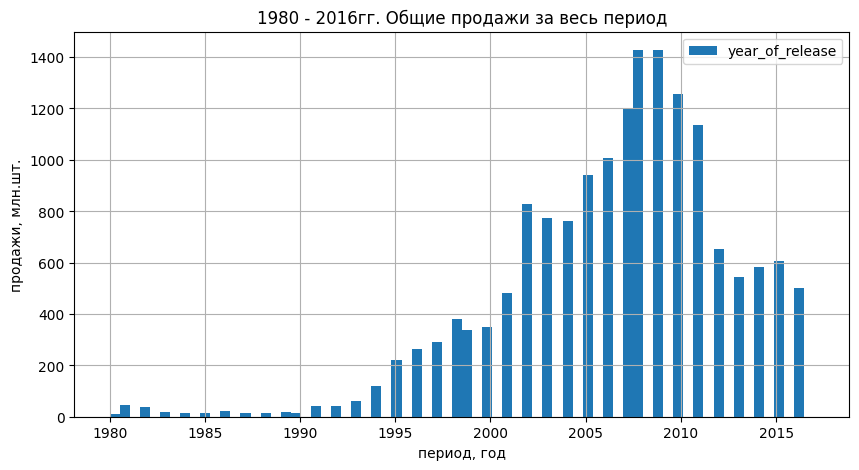

In [22]:
data.plot(y = 'year_of_release', x = 'total_sales', kind = 'hist', bins = 70, grid=True, figsize = (10,5), range = (1980,2017))
plt.title('1980 - 2016гг. Общие продажи за весь период')
plt.xlabel('период, год')
plt.ylabel('продажи, млн.шт.')
plt.show()

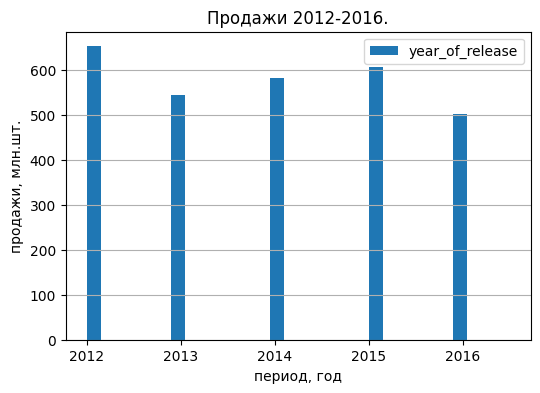

In [23]:
data.plot(y = 'year_of_release', x = 'total_sales', kind = 'hist', bins = 30, figsize = (6,4), range = (2012, 2016.5))
plt.grid(b=True, axis='y') 
plt.title('Продажи 2012-2016.')
         
plt.ylabel('продажи, млн.шт.')
plt.xlabel('период, год')
plt.show()

#### Вывод  
Визуализировали данные продаж за весь период, и рассмотрели по отдельности.  
Разделили общий период на три части:  
- Старт продаж это период 1980 - 1993гг. Продажи за этот отрезок времени максимум доходили до 60 млн. шт. Этот период можно не учитывать в исследовании и некорректно сравнивать с другими годами.
- Период роста продаж 1994 - 2001гг. Период активного роста продаж, из года в год прибавлялось примерно 50 -100 млн. шт. Период довольно не стабильный, в случае необходимости этих данных, рассматривать его нужно внимательно. 
- С 2002 по 2015гг (данные за 2016 могут быть не полными) наблюдается более ясная картина с пиком продаж 2008-2009гг до 1400 млн.шт. С 2011 на 2012г год резкое падение с 1200 млн.шт. до 600 млн.шт. Но далее 2012-2016гг динамика продаж стабильна.

**Для Актуального периода выберем 2014 -2016гг. Данные за предыдущий период учитывать не будем**

### Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [24]:
#создадим датафрейм с датами Актуального периода выберем 2014-2016гг.
dt_actual = data[data['year_of_release'] > 2013]
dt_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98


In [25]:
platform_sale = dt_actual.groupby('platform').sum()[['total_sales']].sort_values(by = 'total_sales', ascending = False)
platform_sale.head(10)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In [26]:
#выведем ТОП платформ с большими выбоками
top_platform = list(platform_sale.index[:6])
top_platform

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']

In [27]:
dt_actual.info() #проверим информацию по датафрейму

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    Int64  
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 174.8+ KB


In [28]:
dt_actual.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       971
user_score         801
rating             749
total_sales          0
dtype: int64

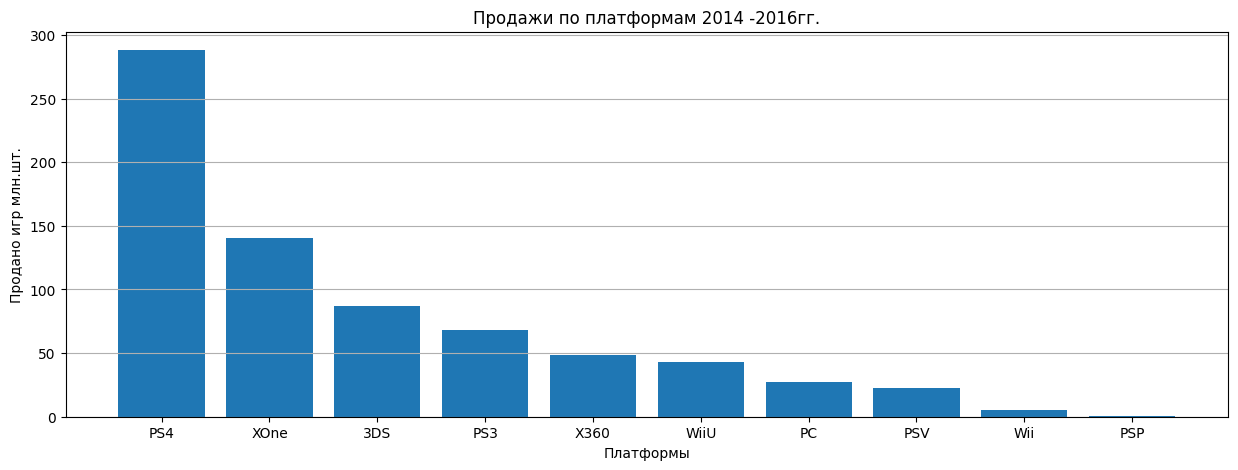

In [29]:
#выведем общие продажи по платформам
plt.figure(figsize=(15,5))
plt.bar(platform_sale.index, platform_sale['total_sales'])
plt.grid(b=True, axis='y') 
plt.title('Продажи по платформам 2014 -2016гг.')
plt.xlabel("Платформы");
plt.ylabel("Продано игр млн.шт.");

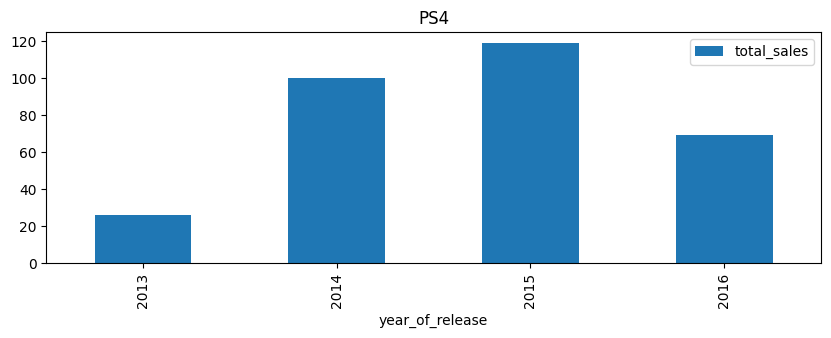

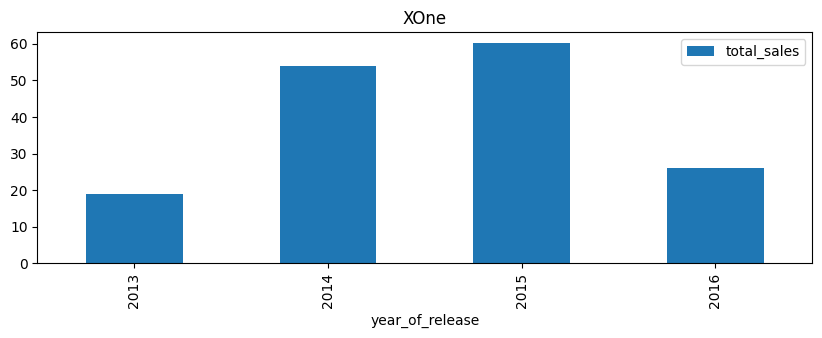

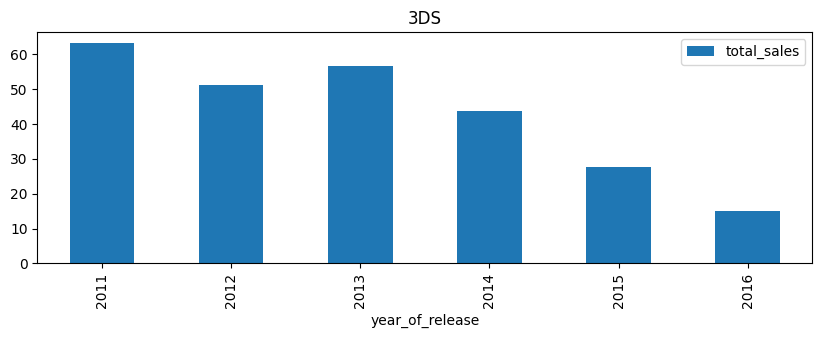

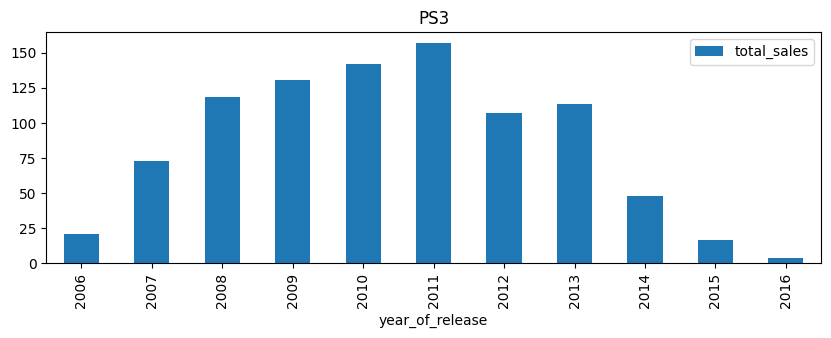

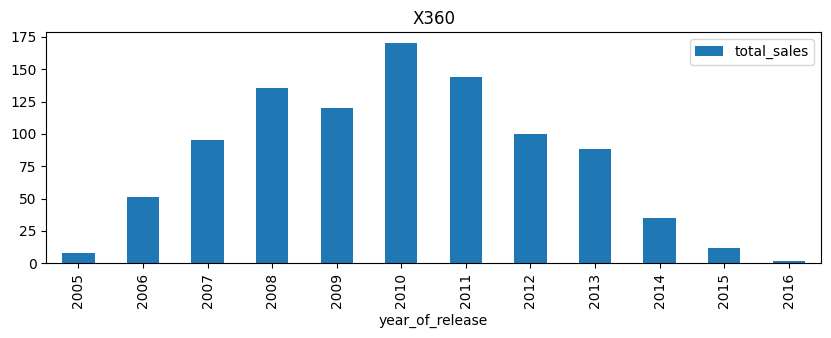

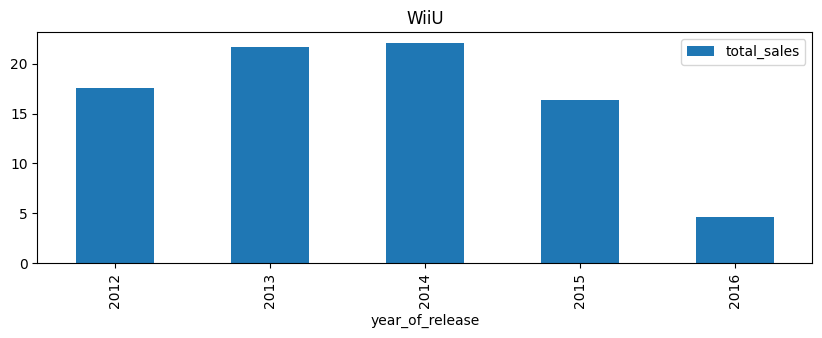

In [30]:
#выведем продажи по ТОП платформам
for platform in top_platform:
    platform_sales = pd.pivot_table(
        data.query('platform == @platform'), 
        index=['year_of_release'], 
        values='total_sales', 
        aggfunc='sum')
    platform_sales.plot(kind = 'bar', figsize=(10,3));
    plt.title(platform)

Вывод: 
В среднем жизненный цикл платформ 10 лет. 

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0.5, 0, 'Продажи, млн.шт.')

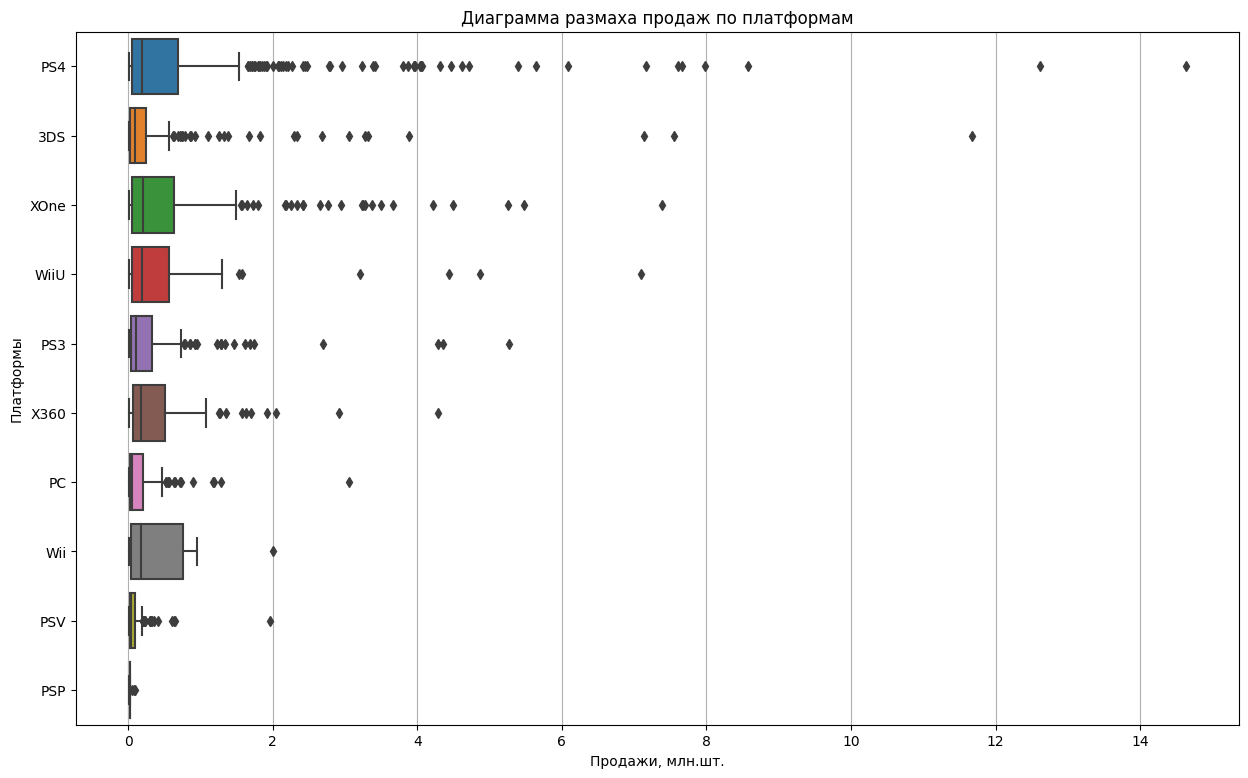

In [31]:
#диаграмма размаха продаж по платформам
plt.figure(figsize=(15,9))

sns.boxplot(x="total_sales", 
            y="platform", 
            data=dt_actual.reset_index());
plt.grid(b=True, axis='x')
plt.title('Диаграмма размаха продаж по платформам')
plt.ylabel('Платформы') 
plt.xlabel('Продажи, млн.шт.')

Text(0, 0.5, 'Продажи, млн.шт.')

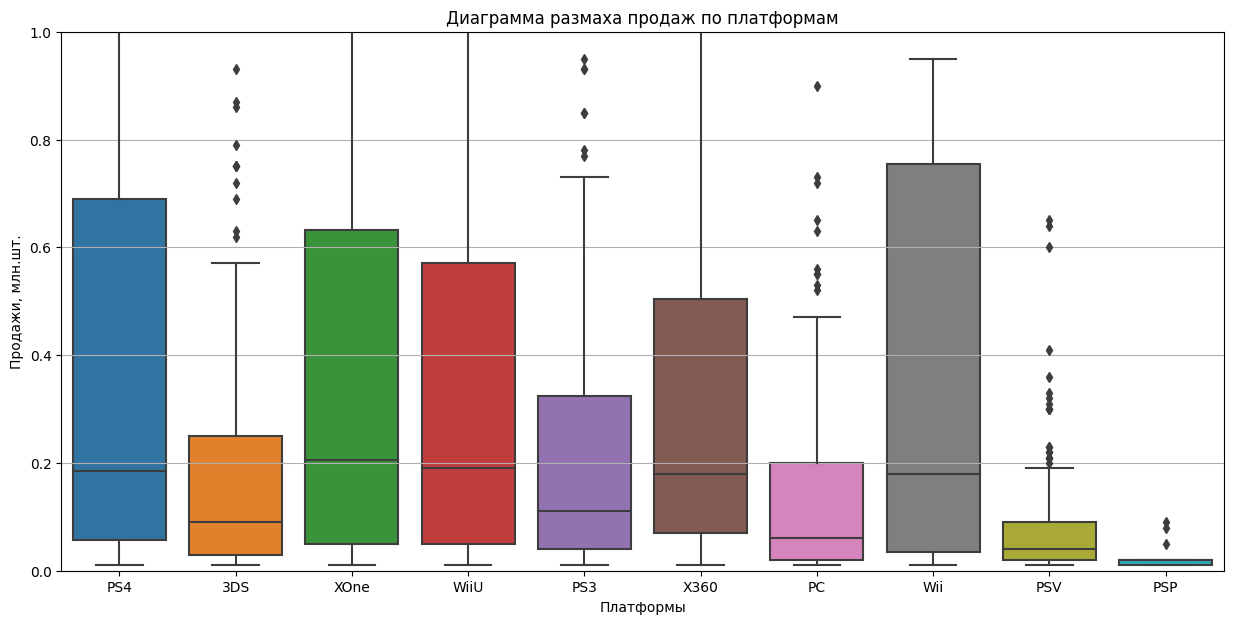

In [32]:
#диаграмма размаха продаж по платформам
#добавим ограничение, чтобы исключить выбросы
plt.figure(figsize=(15,7))

ax = sns.boxplot(data=dt_actual,
            y="total_sales", 
            x="platform");
ax.set_ylim(0,1)
ax.grid(b=True, axis='y')
ax.set_ylim(0,1)
plt.title('Диаграмма размаха продаж по платформам')
plt.xlabel('Платформы') 
plt.ylabel('Продажи, млн.шт.')

 Вывод  
Построили второй график с большим ограничением по продажам. По второму графику видно, что медианные продажи примерно на одном уровне 0,2 млн копий. Сильный размах диаграмм показывает, что основную прибыль платформы получают от игр которые находятся в выбросах графиков.
Рассмотрим платформы с сильными выбросами, как потенциально прибыльные.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?  


In [33]:
#матрица корреляции по платформе 'PS4' 
correl_PS4 = dt_actual[dt_actual['platform'] == 'PS4']
correl_PS4 = correl_PS4.loc[:,['total_sales', 'critic_score', 'user_score']]
display(correl_PS4.corr())

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


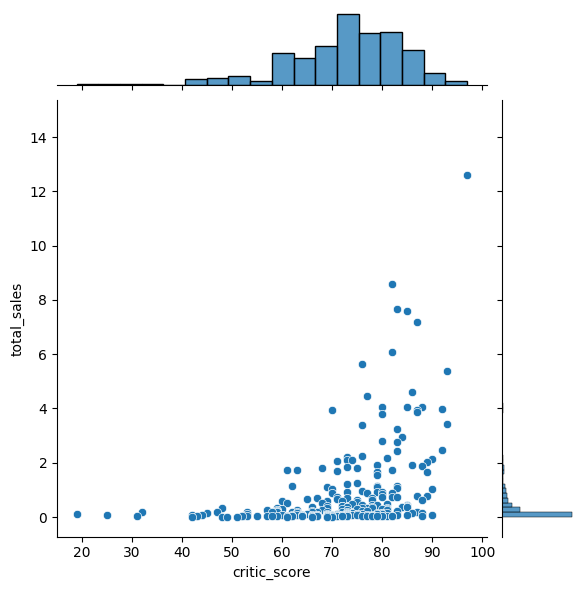

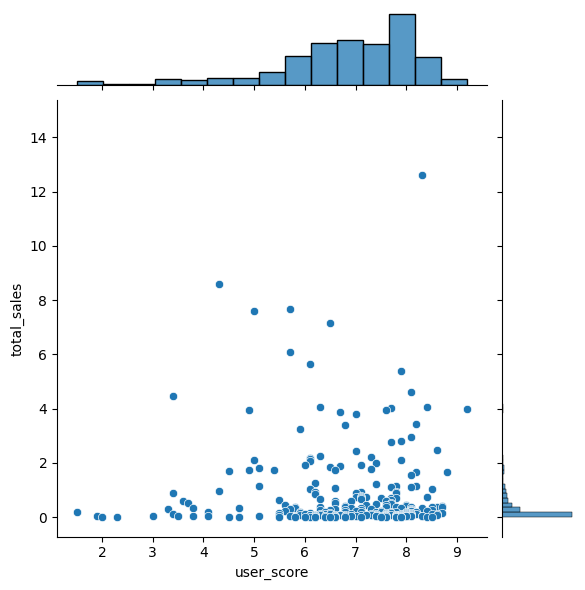

In [34]:
#диаграмма рассеяния
sns.jointplot(x = "critic_score", y = "total_sales", 
              kind = "scatter", data = correl_PS4) 
plt.show()
sns.jointplot(x = "user_score", y = "total_sales", 
              kind = "scatter", data = correl_PS4)
plt.show()

Вывод.   
Платформа PS4 - 1 место в продажах. 
 По первому графику с оценками критиков, видно что небольшое влияние на продажи оказывают оценки критиков. Корреляция равна 40% 
 
 На графике отношения между оценками пользователей и продажами видно, что корреляции нет, значение почти равно нулю. 


In [35]:
#матрица корреляции по платформе '3DS' 
correl_3DS = dt_actual[dt_actual['platform'] == '3DS']
correl_3DS = correl_3DS.loc[:,['total_sales', 'critic_score', 'user_score']]
display(correl_3DS.corr())

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


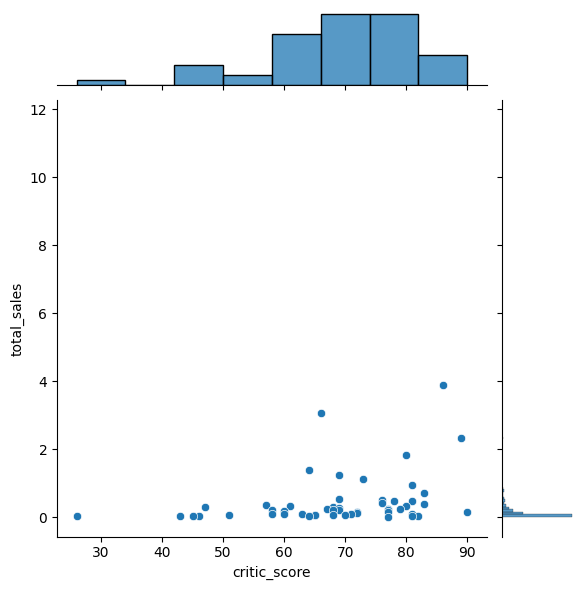

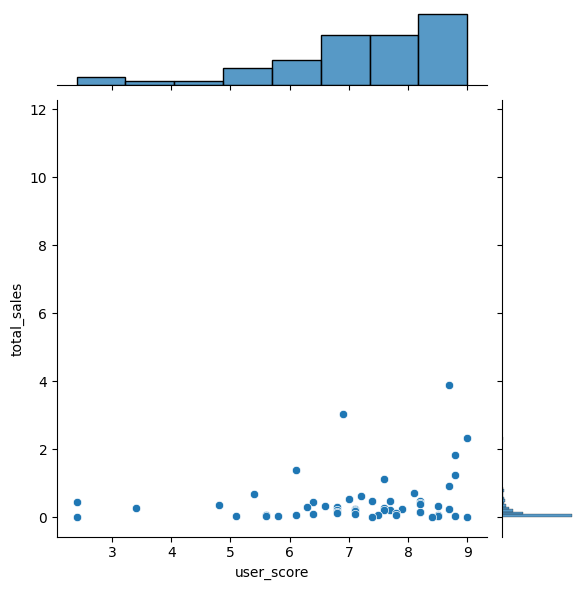

In [36]:
#диаграмма рассеяния 3DS
sns.jointplot(x = "critic_score", y = "total_sales", 
              kind = "scatter", data = correl_3DS) 
plt.show()
sns.jointplot(x = "user_score", y = "total_sales", 
              kind = "scatter", data = correl_3DS)
plt.show()

платформа 3DS занимает 3е место по продажам. кореляция между оценками пользователей и продажами, как и оценок критиков и продадами очень слабая.

In [37]:
#матрица корреляции по платформе 'XOne' 
correl_XOne = dt_actual[dt_actual['platform'] == 'XOne']
correl_XOne = correl_XOne.loc[:,['total_sales', 'critic_score', 'user_score']]
display(correl_XOne.corr())

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


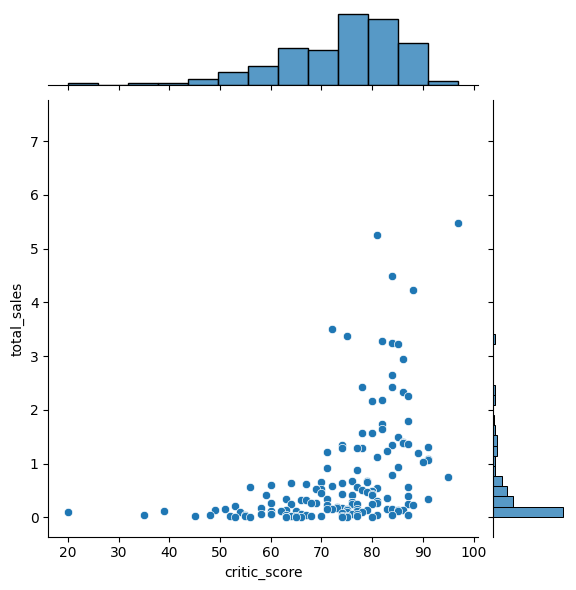

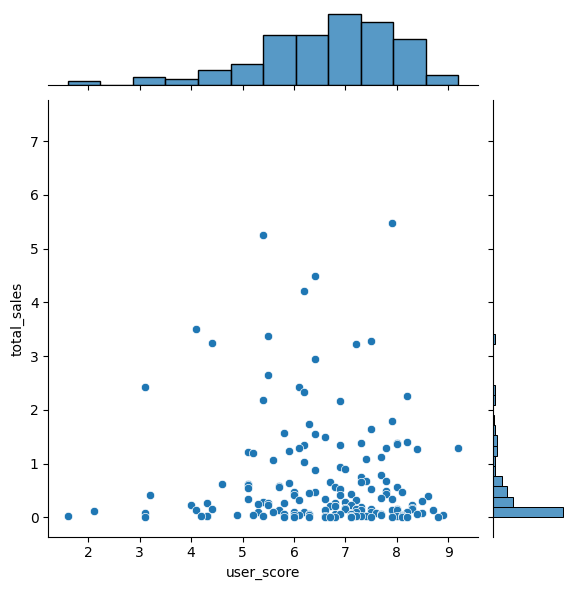

In [38]:
#диаграмма рассеяния XOne
sns.jointplot(x = "critic_score", y = "total_sales", 
              kind = "scatter", data = correl_XOne) 
plt.show()
sns.jointplot(x = "user_score", y = "total_sales", 
              kind = "scatter", data = correl_XOne)
plt.show()

Вывод  
Платформа XOne занимает второе место. гГрафики корреляция сходи с платфомрой PS4, корреляция с оценками критиков 42%, пользовтелей - 7%    

**Общий вывод**  

Оценки критиков могу немного окызывать влияние на продажи. Оценки пользоватлей не оказывают влияние на продаж.

### Общее распределение игр по жанрам.

[Text(0.5, 1.0, 'Распеделение продаж по жанрам'),
 Text(0, 0.5, 'Жанры'),
 Text(0.5, 0, 'Общие продажи, млн.шт.')]

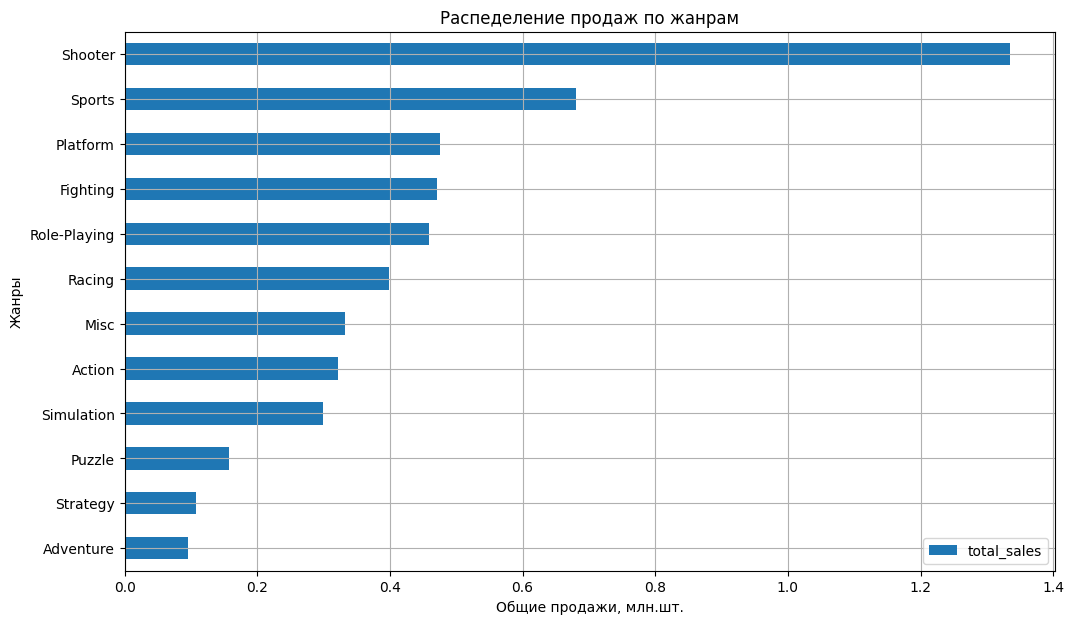

In [39]:
#построим диаграмму распределения продаж по жанрам
(
dt_actual
    .pivot_table(index='genre', values='total_sales')
    .sort_values(by = 'total_sales')
    .plot( kind = 'barh', grid=True, figsize=(12, 7))
    .set(title = 'Распеделение продаж по жанрам', ylabel = 'Жанры', xlabel = 'Общие продажи, млн.шт.')
)

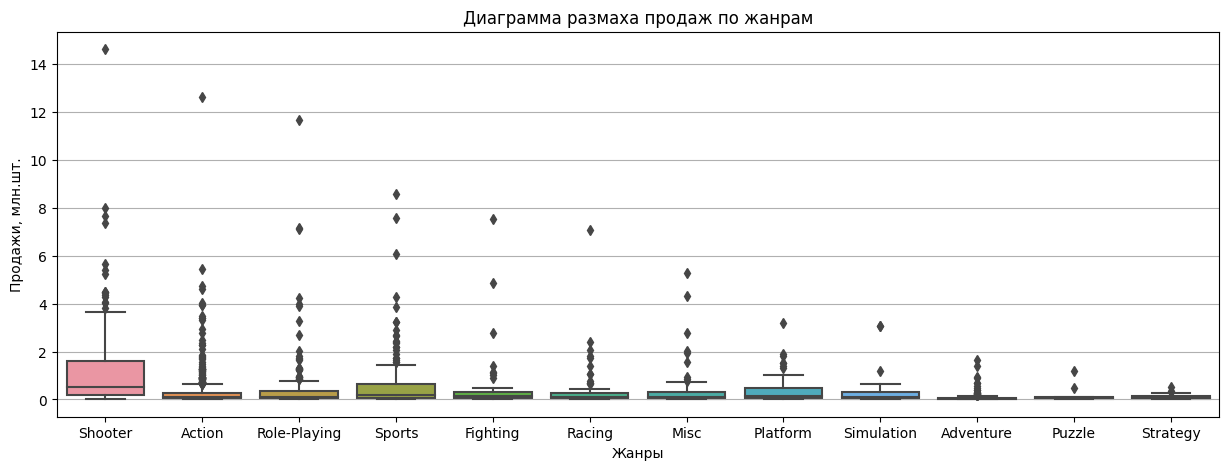

In [40]:
##диаграмма размаха продаж по жанрам
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=dt_actual,
            y="total_sales", 
            x="genre");                        
ax.grid(b=True, axis='y')
#ax.set_ylim(0,1.5)
plt.title('Диаграмма размаха продаж по жанрам')
plt.xlabel('Жанры') 
plt.ylabel('Продажи, млн.шт.');

Text(0, 0.5, 'Продажи, млн.шт.')

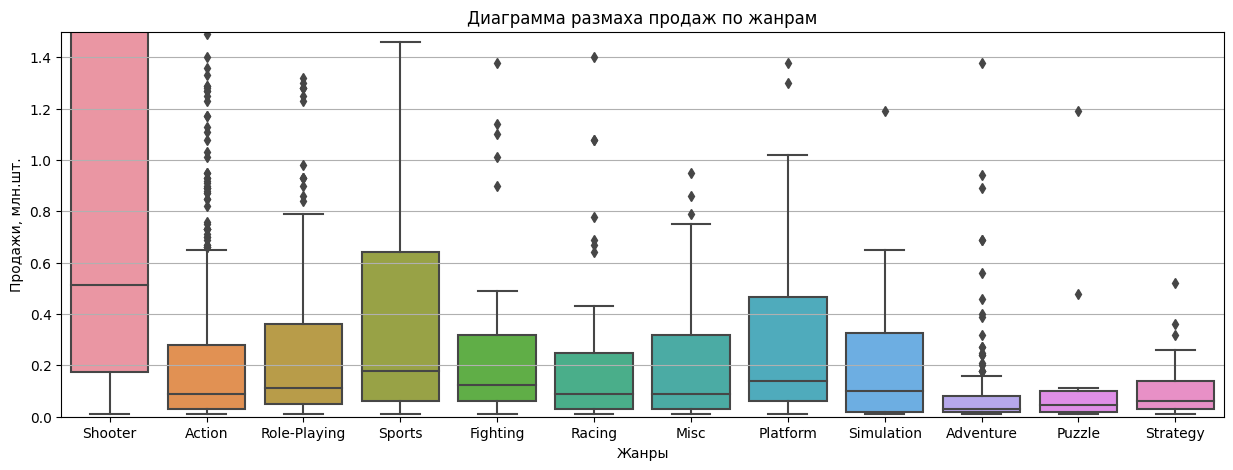

In [41]:
#диаграмма размаха продаж по жанрам
#добавим ограничение, чтобы исключить выбросы
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=dt_actual,
            y="total_sales", 
            x="genre");                        
ax.grid(b=True, axis='y')
ax.set_ylim(0,1.5)
plt.title('Диаграмма размаха продаж по жанрам')
plt.xlabel('Жанры') 
plt.ylabel('Продажи, млн.шт.')

**Вывод**   
Самые популярные жанры  
Shooter   
Platform  
Sports  

Менее популярные жанры  
Strategy  
Adventure  

Диаграмма размаха показывает, что жанр Sports имеет самые большие выбросы. Возможно они и вывели в топ этот жанр. 
Shooter знимает первое место в топ жанров. Приэтом диаграмма размаха имеет минимум выбросов, и большой межквартильный размах относительно других. То есть продажи по этому жанру более стабильны.

## Портрет пользователя каждого региона  
Определите для пользователя каждого региона (NA, EU, JP):  

### Самые популярные платформы (топ-5)
сводник - группировка, df.groupby(платформа)[регион].sum().скинуть индекс.сортировка.первые_пять

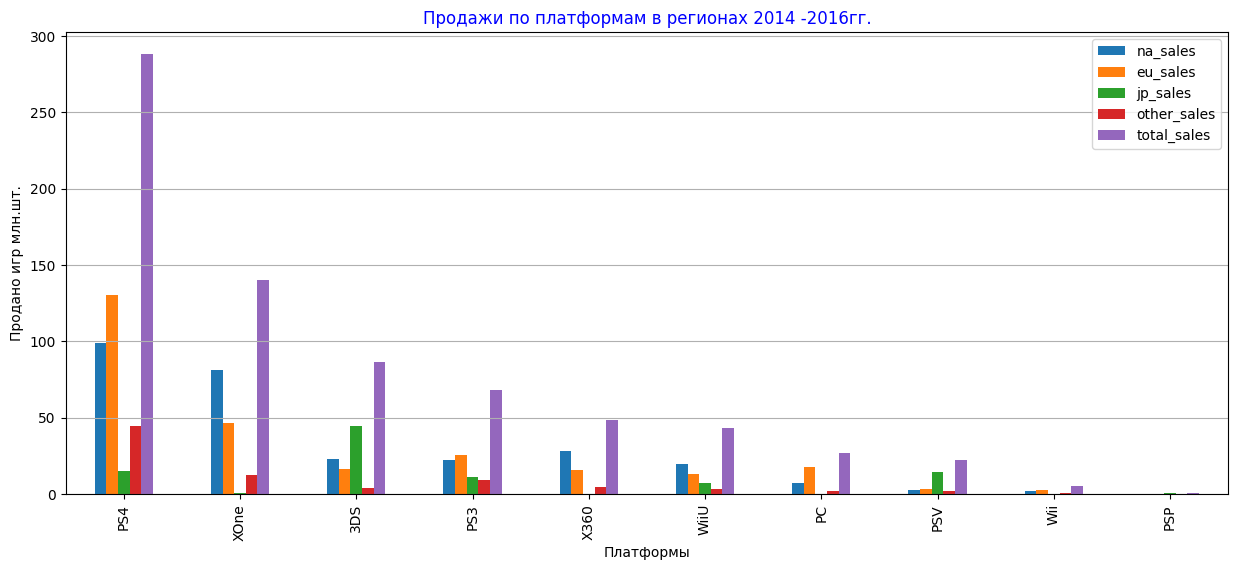

In [42]:
#сформируем общие продажи в разрезе всех регионов
sales_platform = dt_actual[[x for x in data.columns if 'sales' in x] + ['platform']]
sales_platform = sales_platform.groupby('platform').sum().sort_values('total_sales', ascending = False)
sales_platform.plot.bar(figsize=(15,6))
plt.grid(b=True, axis='y')

plt.title('Продажи по платформам в регионах 2014 -2016гг.', color='blue')
plt.xlabel("Платформы");
plt.ylabel("Продано игр млн.шт.");

In [43]:
#сформируем датафрейм с ТОП 5 по ЕU
eu_reg = dt_actual.pivot_table(index='platform', values='eu_sales', aggfunc = 'sum')
top_eu_reg = eu_reg.sort_values(by = 'eu_sales', ascending = False).head()
eu_other = eu_reg['eu_sales'].sum() - top_eu_reg['eu_sales'].sum()
eu_other_platform = pd.DataFrame({'eu_sales' : [eu_other]}, index=['other'])
eu_top_with_other = pd.concat([top_eu_reg, eu_other_platform])
eu_top_with_other

,eu_sales
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
other,34.76


In [44]:
#сформируем датафрейм с ТОП 5 по NA
na_reg = dt_actual.pivot_table(index='platform', values='na_sales', aggfunc = 'sum')
top_na_reg = na_reg.sort_values(by = 'na_sales', ascending = False).head()
na_other = na_reg['na_sales'].sum() - top_na_reg['na_sales'].sum()
na_other_platform = pd.DataFrame({'na_sales' : [na_other]}, index=['other'])
na_top_with_other = pd.concat([top_na_reg, na_other_platform])
na_top_with_other

,na_sales
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
other,31.19


In [45]:
#сформируем датафрейм с ТОП 5 по JP
jp_reg = dt_actual.pivot_table(index='platform', values='jp_sales', aggfunc = 'sum')
top_jp_reg = jp_reg.sort_values(by = 'jp_sales', ascending = False).head()
jp_other = jp_reg['jp_sales'].sum() - top_jp_reg['jp_sales'].sum()
jp_other_platform = pd.DataFrame({'jp_sales' : [jp_other]}, index=['other'])
jp_top_with_other = pd.concat([top_jp_reg, jp_other_platform])
jp_top_with_other

,jp_sales
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
other,0.76


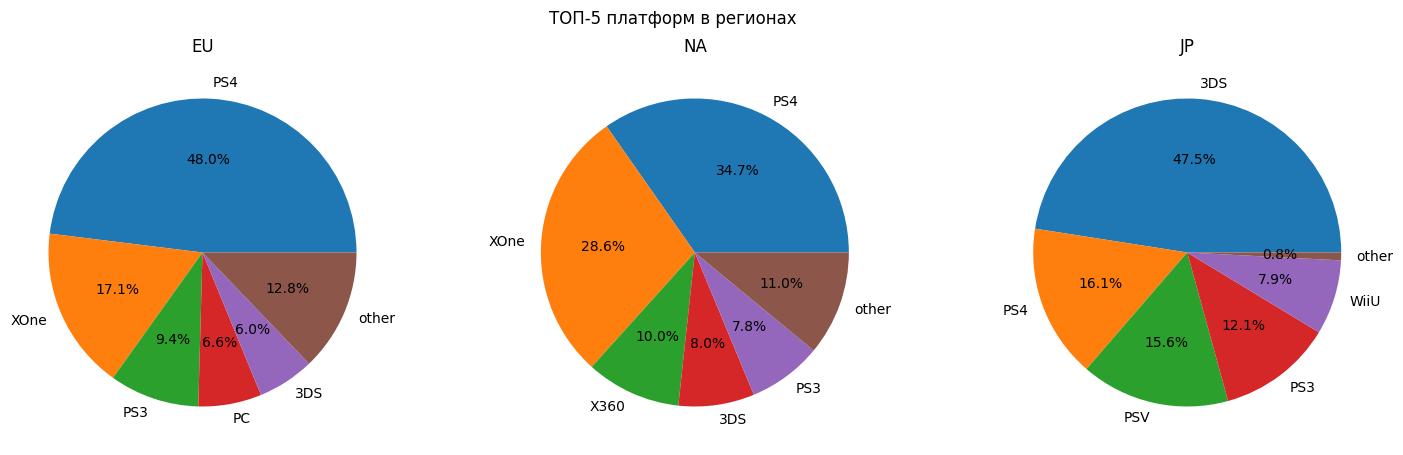

In [46]:
plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('ТОП-5 платформ в регионах')

plt.subplot(1, 3, 1)
plt.pie(eu_top_with_other['eu_sales'], autopct='%1.1f%%', labels=eu_top_with_other.index)
plt.title('EU')

plt.subplot(1, 3, 2)
plt.pie(na_top_with_other['na_sales'], autopct='%1.1f%%', labels=na_top_with_other.index)
plt.title('NA')

plt.subplot(1, 3, 3)
plt.pie(jp_top_with_other['jp_sales'], autopct='%1.1f%%', labels=jp_top_with_other.index)
plt.title('JP')

plt.show()

Вывод  
ТОП 5 платформ в Европе занимает 82% общих продаж.  
Большей популярностью пользуются PS, но также пользуются спросом платформы Xbox 360

ТОП 5 платформ в Северной Америке занимает 85% общих продаж.  
Первое место в ТОП 5 Северной Америки занимает платформа Xbox 360 производства США. Платформы PS также имеют значительную долю в продажах 
 
ТОП 5 платформ в Японии занимает 76% общих продаж.   
Первое место в ТОП 5 занимает платформа 3DS. Остальные платформы таже производства Японии. Что ожидаемо, т.к. Япония производит большинсво популярных игровых платформ.

### Самые популярные жанры (топ-5)

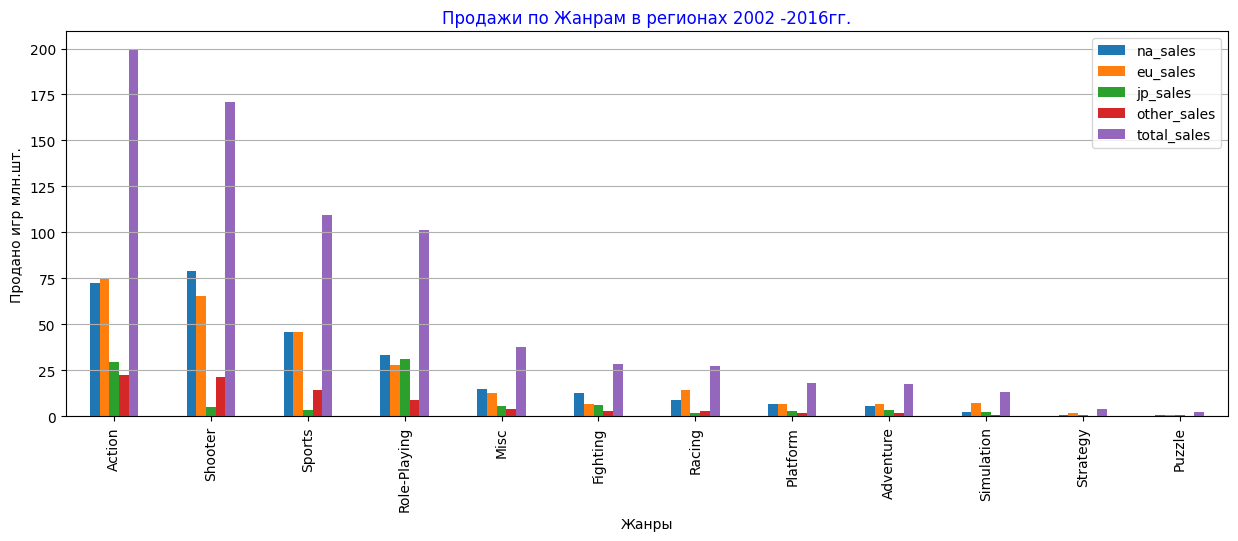

In [47]:
#сформируем общие продажи по жанрам в разрезе всех регионов
sales_genre = dt_actual[[x for x in data.columns if 'sales' in x] + ['genre']]
sales_genre = sales_genre.groupby('genre').sum().sort_values('total_sales', ascending = False)
sales_genre.plot.bar(figsize=(15,5))
plt.grid(b=True, axis='y')

plt.title('Продажи по Жанрам в регионах 2002 -2016гг.', color='blue')
plt.xlabel("Жанры");
plt.ylabel("Продано игр млн.шт.");

In [48]:
#сформируем датафрейм с ТОП 5 по ЕU
eu_reg = dt_actual.pivot_table(index='genre', values='eu_sales', aggfunc = 'sum')
top_eu_reg = eu_reg.sort_values(by = 'eu_sales', ascending = False).head()
eu_other = eu_reg['eu_sales'].sum() - top_eu_reg['eu_sales'].sum()
eu_other_platform = pd.DataFrame({'eu_sales' : [eu_other]}, index=['other'])
eu_top_with_genre = pd.concat([top_eu_reg, eu_other_platform])
eu_top_with_genre

,eu_sales
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
other,42.45


In [49]:
#сформируем датафрейм с ТОП 5 по NA
na_reg = dt_actual.pivot_table(index='genre', values='na_sales', aggfunc = 'sum')
top_na_reg = na_reg.sort_values(by = 'na_sales', ascending = False).head()
na_other = na_reg['na_sales'].sum() - top_na_reg['na_sales'].sum()
na_other_platform = pd.DataFrame({'na_sales' : [na_other]}, index=['other'])
na_top_with_genre = pd.concat([top_na_reg, na_other_platform])
na_top_with_genre

,na_sales
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
other,37.86


In [50]:
#сформируем датафрейм с ТОП 5 по JP
jp_reg = dt_actual.pivot_table(index='genre', values='jp_sales', aggfunc = 'sum')
top_jp_reg = jp_reg.sort_values(by = 'jp_sales', ascending = False).head()
jp_other = jp_reg['jp_sales'].sum() - top_jp_reg['jp_sales'].sum()
jp_other_platform = pd.DataFrame({'jp_sales' : [jp_other]}, index=['other'])
jp_top_with_genre = pd.concat([top_jp_reg, jp_other_platform])
jp_top_with_genre

,jp_sales
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
other,15.50


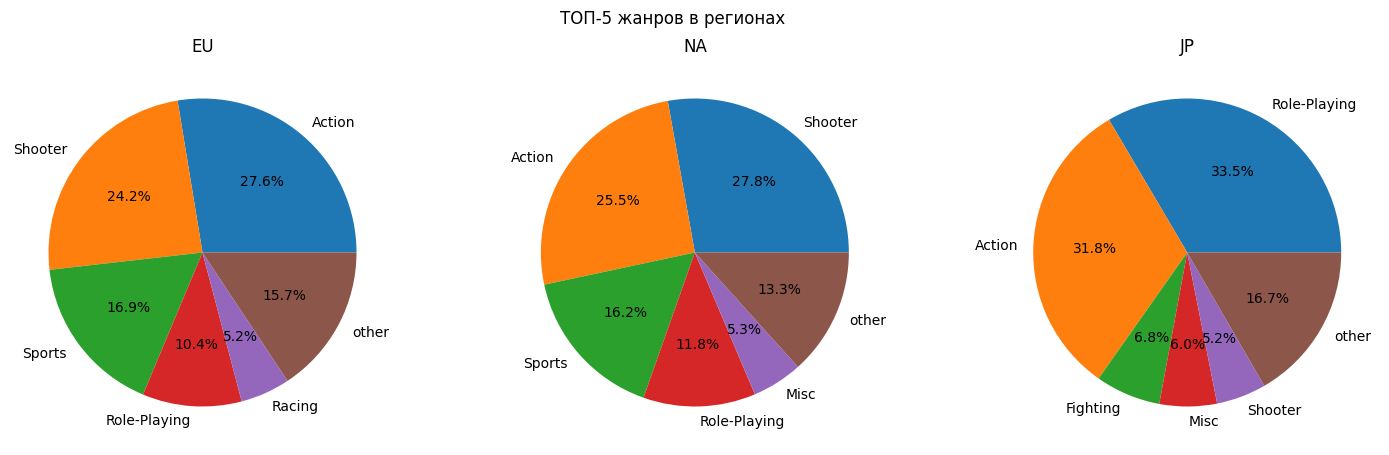

In [64]:
plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('ТОП-5 жанров в регионах')

plt.subplot(1, 3, 1)
plt.pie(eu_top_with_genre['eu_sales'], autopct='%1.1f%%', labels=eu_top_with_genre.index)
plt.title('EU')

plt.subplot(1, 3, 2)
plt.pie(na_top_with_genre['na_sales'], autopct='%1.1f%%', labels=na_top_with_genre.index)
plt.title('NA')

plt.subplot(1, 3, 3)
plt.pie(jp_top_with_genre['jp_sales'], autopct='%1.1f%%', labels=jp_top_with_genre.index)
plt.title('JP')

plt.show()

Вывод  
Самым популярным Жанром в Европе и Северной Америке является Экшн, на втором месте Спорт, и третье занимает Шутер.   

Популярные жанры игр в Японии  отличается от Америки и Европы. Первое место со значительной долей занимает Ролевые игры, Втрое место показывает - Экш популярный жанр, третье - Misc

### Влияние рейтинга ESRB на продажи в отдельном регионе  
Рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [52]:
dt_actual['rating'].isna().sum()

749

In [53]:
#выведем перечень уникальных значений из столбца rating
dt_actual['rating'].sort_values().unique()

array(['E', 'E10+', 'M', 'T', nan], dtype=object)

In [54]:
#заменим nan на значение 'RP' -"Рейтинг ожидается"
dt_actual = dt_actual.reset_index()
dt_actual['rating'] = dt_actual['rating'].fillna('RP')


In [55]:
dt_actual['rating'].unique()

array(['RP', 'M', 'E', 'T', 'E10+'], dtype=object)

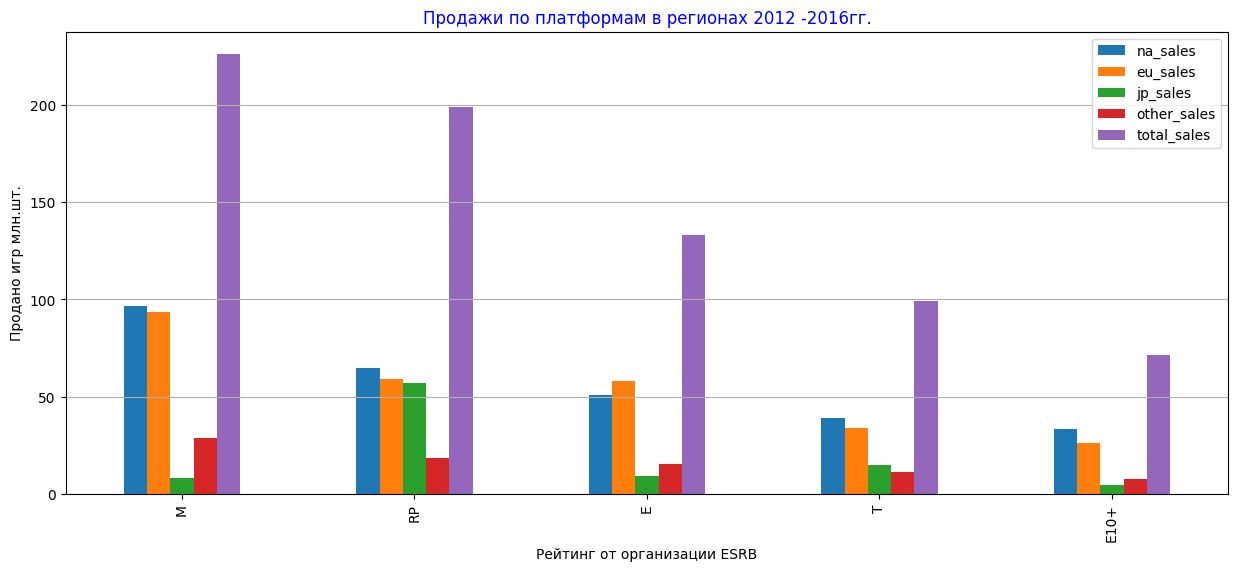

In [56]:
#сформируем общие продажи в разрезе всех регионов
sales_platform = dt_actual[[x for x in data.columns if 'sales' in x] + ['rating']]
sales_platform = sales_platform.groupby('rating').sum().sort_values('total_sales', ascending = False)
sales_platform.plot.bar(figsize=(15,6))
plt.grid(b=True, axis='y')

plt.title('Продажи по платформам в регионах 2012 -2016гг.', color='blue')
plt.xlabel("Рейтинг от организации ESRB");
plt.ylabel("Продано игр млн.шт.");

In [57]:
esrb_rating = dt_actual.pivot_table(index = 'rating', values = ['eu_sales','na_sales','jp_sales'], aggfunc = 'sum')
esrb_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
RP,58.95,56.90,64.72
T,34.07,14.78,38.95


Вывод  
«EC» («Early childhood») — «Для детей младшего возраста»    
«E» («Everyone») — «Для всех»: для всех возрастов  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»    
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет   
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет  
«AO» («Adults Only 18+») — «Только для взрослых»   
«RP» («Rating Pending») — «Рейтинг ожидается»

Рейтинг ESRB оказывает влияние на продажу. Мы видим, что самые популярные игры с рейтингом «M» - для взрослых, на втором месте игры без рейтинга, возможно новые, но популярные. Менее популярныигры для детей.

Возрастными рейтингами для консольных игр в Японии занимается CERO – некоммерческая организация, основанная в июле 2002-го.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  

Сформулируем гипотезы:

- Н0: Средний пользовательский рейтинг платформ Xbox One и PC равны
- H1: Средний пользовательский рейтинг платформ Xbox One и PC различается  

alpha = 0.05

In [58]:
#удалим пропуски в столбце user_score
dt_actual = dt_actual.dropna(subset=['user_score'])
dt_actual['user_score'].isna().sum()

0

In [59]:
#введём 2 переменных с данными по Xbox One и PC
xbox = dt_actual[(dt_actual['platform'] == 'XOne') & (dt_actual['user_score'] > 0)]['user_score']
pc = dt_actual[(dt_actual['platform'] == 'PC') & (dt_actual['user_score'] > 0)]['user_score']
print("Средний пользовательский рейтинг Xbox One:", xbox.mean())
print("Средний пользовательский рейтинг PC:", pc.mean())

Средний пользовательский рейтинг Xbox One: 6.594545454545456
Средний пользовательский рейтинг PC: 6.298360655737705


In [60]:
#проверяем гипотезу
alpha = .05
results = st.ttest_ind(xbox, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [61]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19124505225722097
Не получилось отвергнуть нулевую гипотезу


Вывод   
Нулевая гипотеза не была отвергнута. Можем предполагать, что пользовательский рейтинг платформ Xbox One и PC равен.

###  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
Сформулируем гипотезы:  
- H0: Средние пользовательские рейтинги жанров Action и Sports равны  
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются  

alpha = 0.05  



In [62]:
#введём 2 переменных с данными Action и Sports
action = dt_actual[(dt_actual['genre'] == 'Action') & (dt_actual['user_score'] > 0)]['user_score']
sports = dt_actual[(dt_actual['genre'] == 'Sports') & (dt_actual['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', action.mean())
print('Средний пользовательский рейтинг жанра Sports', sports.mean())

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports 5.2251968503937


In [63]:
#проверяем гипотезу
alpha = 0.05

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Вывод   
Нулевая гипотеза была отвергнута. Можем предположить, что средние пользовательские рейтинги жанров Action и Sports различаются

## Общий вывод

**Описание проекта**  
Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  


Предоставлены данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й.   

**Описание данных**
Name — Название игры  
Platform — Платформа  
Year_of_Release — Год выпуска игры  
Genre — Жанр игры  
NA_sales — Продажи в Северной Америке (миллионы проданных копий)  
EU_sales — Продажи в Европе (миллионы проданных копий)  
JP_sales — Продажи в Японии (миллионы проданных копий)  
Other_sales — Продажи в других странах (миллионы проданных копий)  
Critic_Score — Оценка критиков (максимум 100)  
User_Score — Оценка пользователей(максимум 10)  
Rating — Возрастной рейтинг. рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.   

**Подготовка данных**   
Загрузили данные вывели первые строки:
- переименовали столбцы (привести к нижнему регистру)  
- явных дубликатов нет

- Найдены значения "tbd" - to be determined - т.е. оценки нет (будет позже)
Заменим tbd на nan, чтобы они не мешали расчетам  

- Тип данных в столбце year_of_release заменили с float на Int
- Проверили, что в столбце critic_score только целые значения и заменили с float на Int
- В столбце user_score заменили 'tbd' на 'nan', чтобы они не мешали расчетам. Тип данных привели к float  

Удалили строки с пропусками в столбцах name и genre  
Осталось большое количество пропусков в столбцах  
critic_score - 51,3 %  
user_score - 54.6 %  
rating - 40.5 %  
Заменить эти пропуски мы не можем. Если их удалить, потеряем большое количество данных. Оставили как есть.  

**Исследовательский анализ данных**   

*Визуализировали данные продаж за весь период, и рассмотрели по отдельности.*    
Разделили общий период на три части:   
- Старт продаж это период 1980 - 1993гг. Продажи за этот отрезок времени максимум доходили до 60 млн. шт. Этот период можно не учитывать в исследовании и некорректно сравнивать с другими годами.
- Период роста продаж 1994 - 2001гг. Период активного роста продаж, из года в год прибавлялось примерно 50 -100 млн. шт. Период довольно не стабильный, в случае необходимости этих данных, рассматривать его нужно внимательно. 
- С 2002 по 2015гг (данные за 2016 могут быть не полными) наблюдается более ясная картина с пиком продаж 2008-2009гг до 1400 млн.шт. С 2011 на 2012г год резкое падение с 1200 млн.шт. до 600 млн.шт. Но далее 2012-2016гг динамика продаж стабильна.

**Для Актуального периода выберем 2012 -2016гг. Данные за предыдущий период учитывать не будем**   

Как менялись продажи по платформам?   
*В среднем жизненный цикл платформ 10 лет. Выбрали 6 платформ с топовыми продажами. За выбранный актуальный период 2012-2016гг продажи всех платформ (за исключением PS4) уже упали или совсем не продаются*   
 
 
 Построили **График «ящик с усами»**. По второму графику (с большим ограничением по продажам)видно, что медианные продажи примерно на одном уровне 0,2 млн копий. Сильный размах диаграмм показывает, что основную прибыль платформы получают от игр которые находятся в выбросах графиков.  
Рассмотрим платформы с сильными выбросами, как потенциально прибыльные.  

**Кореляция между оценками пользователей и продажами нет**, зачения почти равно нулю. Оценка критиков влияет на продажи немного выше, кореляция тоже слабая - 40%   


**Портрет пользователя каждого региона (Европа, Северная Америка, Япония)**  

*Самые популярные платформы по общим продажам PS4, PS3, X360* 

*Самые популярные жанры Экшн, Спорт и Шутер. Не популярны Пазлы и Стратегия.*   

**Потроили круговые диаграммы по ТОП-5 Жанров и ТОП-5 популярных платформы выбраных регионов.**
Самым популярным Жанром в Европе и Северной Америке является Экшн, на втором месте Спорт, и третье занимает Шутер.

Популярные жанры игр в Японии отличается от Америки и Европы. Первое место со значительной долей занимает Ролевые игры, Втрое место показывает - Экш популярный жанр, третье - Misc  

Из диаграмм видно, что пользователи В Японии и в Америке выбирают платформы своего производства.   

На выбор жанра игры оказывает особенности культуры и национальности пользователя.   

Проверили влияние Рейтинга ESRB оказывает на продажу игр.  
Рейтинг ESRB оказывает влияние на продажу. Мы видим, что самые популярные игры с рейтингом «M» - для взрослых, на втором месте игры без рейтинга, возможно новые, но популярные. Менее популярныигры для детей.
